In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Udemy_Courses.csv',parse_dates=['published_timestamp'])
df.head()   # This method show the 2d dataset by default it takes first 5 records to display.

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


* parse means converting one type of data to other types
* Here published_timestamp column have records that show the time along with date of publish but the dtype of this column is object
* This column datatype is converted while reading csv file here we have used parsed_dates parameter to civince pandas to turn things 
into real datetime types.
* By default date columns are represented as object when loading csv file .To read the date column correctly we do parse_dates
* Here we have specified the column that we have to convert into datetime type.
* If we try to convert this column from object to datetiem with astype method it'll throw error because it does not have any
dtype like datetime.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

* df.info is an pandas function that gives the information about the dataset.
* It also shows number of columns and records of dataset along with it's datatypes and number of null values if present.

In [4]:
df.isnull().sum()   #this shows the null values of each column in the dataset if present.

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<AxesSubplot:>

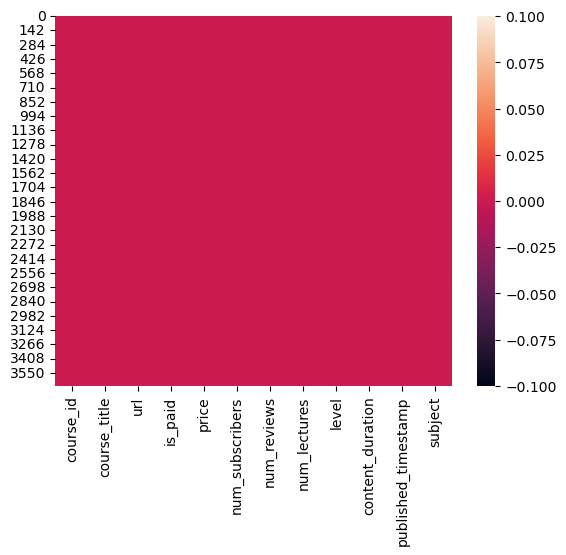

In [5]:
sns.heatmap(df.isnull()) 

* heatmap is a type of graph of seaborn-it plot rectanular data as color-encoded matriz along with scale of values.
* As we can see that this dataset has no null values in it as there is no negative value in the plot.

In [6]:
# To check if there is any duplcate value in our dataset or not 
# It's shwoing true means this dataset has some duplicate values
dup=df.duplicated().any()
dup

True

In [7]:
# droppping duplicate values from dataset.
#this method removes duplcate rows
df=df.drop_duplicates()

In [8]:
dup=df.duplicated().any()
dup

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   object             
 2   url                  3672 non-null   object             
 3   is_paid              3672 non-null   bool               
 4   price                3672 non-null   int64              
 5   num_subscribers      3672 non-null   int64              
 6   num_reviews          3672 non-null   int64              
 7   num_lectures         3672 non-null   int64              
 8   level                3672 non-null   object             
 9   content_duration     3672 non-null   float64            
 10  published_timestamp  3672 non-null   datetime64[ns, UTC]
 11  subject              3672 non-null   object             
dtypes: bool(1), datetime

* We can see that earlier there were 3678 rentries after we dropped duplcated entries we get 3672 entries.

# Analysis

# 1) Find Number of courses per Subject.

In [10]:
df['subject'].value_counts()  # this method returns series containing counts of unique values

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

# Visualization

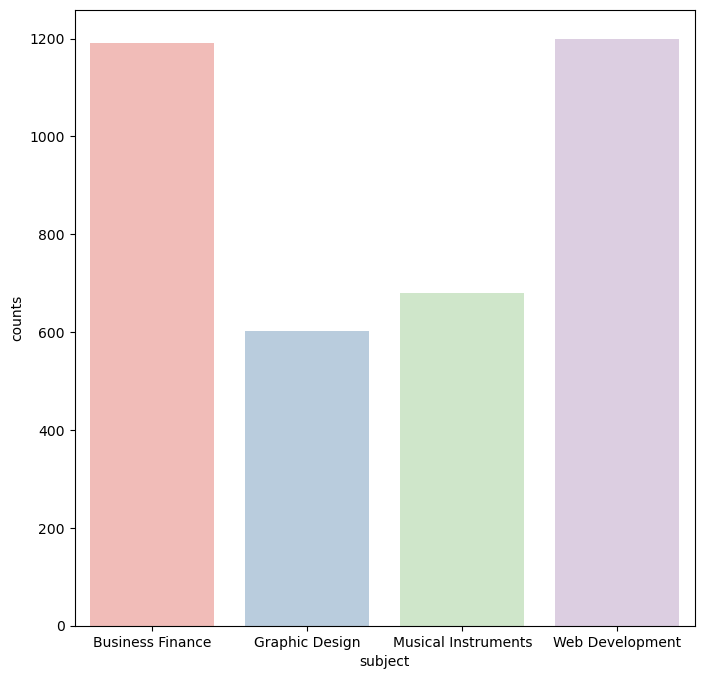

In [11]:
# Countplot of seaborn is used to show the counts of observation in each category using bars.
# Countplot is univariate.
plt.figure(figsize=(8,8))
sns.countplot(data=df,x=df['subject'],palette='Pastel1')
plt.xlabel('subject')
plt.ylabel('counts')
plt.show()

From the above graph we can observe that Web Development has the highest number of courses from dataset which is around 1200.

Also Business Finance subject has close count to that of Web Development.

Grpahic Design has the least counts here.


# 2)Show the types of levels of udemy courses subjectwise.

In [12]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

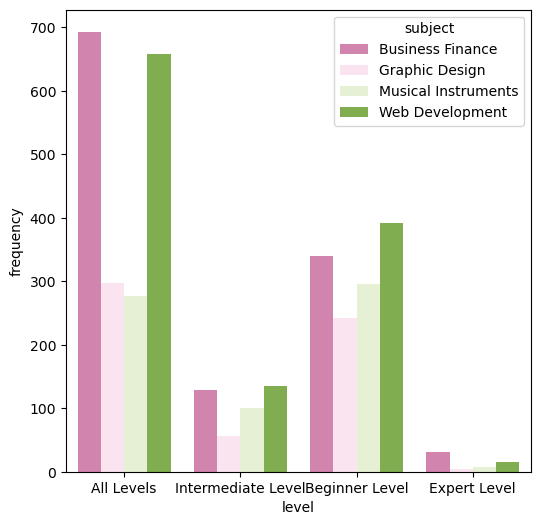

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df['level'],palette='PiYG',hue='subject')
plt.xlabel('level')
plt.ylabel('frequency')
plt.show()

* The above datasets has 4 subject and 4 levels of courses.
* The graph is made on subject categroy where as hue is used for colour encoding here we have given hue of subject column so
the graph is representing subject wise course level with their frequency.
* All levels is the highest among all in which subject business finance has highest contribution.
* Expert level is the least and graphic design subject has overall least count.

# 3)Which group has more courses(free or paid).


In [14]:
df.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


* There are two categroy of is_paid column and it's categorical value which is tru if course is paid and false if course ifs free.
* Here category wise mean has been shown that indicates that mean of the courses which is free is greater as compared to that of paid

# 4)Show that courses which has number of lectures above 200 & price below 200

In [15]:
df.loc[(df['num_lectures']>200)&(df['price']<100)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
122,840300,B Com Accountancy I (Paper ECO 02 IGNOU),https://www.udemy.com/accounts-from-incomplete...,True,50,2946,6,284,All Levels,31.5,2016-05-05 23:07:43+00:00,Business Finance
269,822514,CAIIB Advanced Bank Management (Part I),https://www.udemy.com/statistics-regression-an...,True,25,2953,20,211,All Levels,20.5,2016-04-15 18:43:40+00:00,Business Finance
1638,278948,Become a Professional Graphic Designer,https://www.udemy.com/become-a-professional-gr...,True,35,3618,345,207,All Levels,20.5,2014-08-13 16:37:12+00:00,Graphic Design
1658,978576,The Complete Figure Drawing Course HD,https://www.udemy.com/the-complete-figure-draw...,True,50,1323,136,225,Beginner Level,78.5,2016-10-11 21:40:06+00:00,Graphic Design
2039,574974,The Complete Piano Course - Master The Piano,https://www.udemy.com/the-complete-piano-course/,True,95,4982,276,240,All Levels,23.0,2015-08-20 21:25:34+00:00,Musical Instruments
2171,315812,Gibson's Learn & Master Guitar,https://www.udemy.com/learnandmasterguitar/,True,50,103,33,309,All Levels,38.0,2014-10-30 14:39:14+00:00,Musical Instruments
2188,207440,Super-Curso de Guitarra Práctico Para Principi...,https://www.udemy.com/super-curso-de-guitarra-...,True,85,228,26,215,Beginner Level,10.5,2014-06-30 12:29:38+00:00,Musical Instruments
2211,1048182,Coach Guitar - Apprendre la GUITARE facile ave...,https://www.udemy.com/coach-guitar-apprendre-l...,True,50,25,1,321,All Levels,3.5,2016-12-27 14:51:32+00:00,Musical Instruments
2272,1025536,Coach Guitar - Amazing New Way To Learn Guitar...,https://www.udemy.com/coach-guitar-amazing-new...,True,50,12,0,321,All Levels,3.5,2016-12-27 14:50:10+00:00,Musical Instruments


* Above we can see that there are very few courses with number of courses above 200 and price below 100

# 5)Find the most expensive course detail.

In [16]:
df.loc[df['price']==df['price'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.0,2017-04-18 18:13:32+00:00,Business Finance
10,592338,Forex Trading Secrets of the Pros With Amazon'...,https://www.udemy.com/trading-with-amazons-aws...,True,200,4284,93,76,All Levels,5.0,2015-09-11 16:47:02+00:00,Business Finance
11,975046,Trading Options With Money Flow,https://www.udemy.com/trading-options-using-mo...,True,200,1380,42,17,All Levels,1.0,2016-10-18 22:52:31+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3592,976854,Spring 4 Mastercourse: Covers Annotation & XML...,https://www.udemy.com/java-spring-framework/,True,200,1353,53,320,Intermediate Level,23.5,2016-11-01 22:08:04+00:00,Web Development
3620,1227578,Learning Path: The Road to Elasticsearch,https://www.udemy.com/learning-path-the-road-t...,True,200,50,5,60,Beginner Level,5.0,2017-05-29 17:56:24+00:00,Web Development
3642,709324,Learn Web Development by Creating a Social Net...,https://www.udemy.com/meteor-tutorial/,True,200,442,48,80,Beginner Level,6.5,2015-12-30 16:53:44+00:00,Web Development
3652,919354,Learn Bootstrap 4 The Most Popular HTML5 CSS3 ...,https://www.udemy.com/learn-bootstrap-4-the-mo...,True,200,279,37,119,All Levels,10.0,2017-04-25 00:57:35+00:00,Web Development


* Here the most expensive courses among all has been shown.
* Here the maximum price for course is 200 and there are more than 300 courses with maximum price.

# 6)Display all records of courses having duration between 20 to 24 hours.

In [17]:
df['content_duration'].unique()  # unique() shows the unique values of specified column.

array([ 1.5       , 39.        ,  2.5       ,  3.        ,  2.        ,
        1.        ,  5.        ,  7.        ,  4.        ,  0.58333333,
        4.5       ,  6.5       , 10.        ,  5.5       ,  7.5       ,
       11.5       , 16.        ,  3.5       ,  9.        ,  8.5       ,
       11.        ,  0.7       ,  9.5       ,  0.55      , 62.        ,
        0.13333333,  0.68333333, 31.5       , 20.        ,  6.        ,
       46.5       ,  0.71666667, 17.5       , 12.        ,  0.53333333,
       24.        , 19.5       , 20.5       ,  0.5       , 10.5       ,
        0.51666667,  0.6       ,  8.        , 29.        , 26.        ,
       24.5       , 13.        ,  0.73333333,  0.56666667, 12.5       ,
        0.31666667,  0.61666667,  0.66666667, 18.        , 33.        ,
       71.5       , 47.        , 14.5       ,  0.65      , 18.5       ,
       43.5       ,  0.63333333, 14.        ,  0.46666667, 45.        ,
       70.        ,  0.        , 29.5       , 13.5       ,  0.45

In [18]:
df.loc[(df['content_duration']>=20.0)&(df['content_duration']<=24.0)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
137,730414,"Intro to Investment Banking, M&A, IPO, Modelin...",https://www.udemy.com/investment-banking-merge...,True,60,1922,149,15,All Levels,20.0,2016-01-21 01:25:31+00:00,Business Finance
260,64739,Professional Risk Manager (PRM) Certification:...,https://www.udemy.com/professional-risk-manage...,True,50,116,10,51,All Levels,24.0,2013-07-23 20:18:35+00:00,Business Finance
269,822514,CAIIB Advanced Bank Management (Part I),https://www.udemy.com/statistics-regression-an...,True,25,2953,20,211,All Levels,20.5,2016-04-15 18:43:40+00:00,Business Finance
282,666254,Curso Avanzado de Trading,https://www.udemy.com/curso-avanzado-de-trading/,True,125,106,11,100,All Levels,20.5,2015-11-28 06:25:44+00:00,Business Finance
589,1185936,الدروس التعليمية لسوق الفوركس والأسواق المالية...,https://www.udemy.com/arabic-forex-education-b...,False,0,368,3,69,All Levels,20.5,2017-04-25 15:02:33+00:00,Business Finance
724,73860,Financial Risk Manager (FRM) Certification: Le...,https://www.udemy.com/financial-risk-manager-f...,True,50,87,25,113,All Levels,24.0,2013-10-26 12:54:58+00:00,Business Finance
1195,880202,Anatomy and Figure Drawing for Beginners,https://www.udemy.com/anatomy-and-figure-drawi...,True,150,2252,240,111,Beginner Level,21.0,2016-06-20 15:31:48+00:00,Graphic Design
1573,117004,How to Draw Pinups and Sexy Women,https://www.udemy.com/how-to-draw-pinups/,True,75,3525,109,33,Intermediate Level,20.0,2013-11-19 03:05:51+00:00,Graphic Design
1638,278948,Become a Professional Graphic Designer,https://www.udemy.com/become-a-professional-gr...,True,35,3618,345,207,All Levels,20.5,2014-08-13 16:37:12+00:00,Graphic Design
1769,1240730,Architectural Drawing For Creatives,https://www.udemy.com/architectural-drawing-fo...,True,195,5,0,156,All Levels,24.0,2017-06-21 15:35:08+00:00,Graphic Design


* content_duration shows the duration of each courses in hours.
* Here a range from 20 to 24 hours has been taken and all the records which comes under this range has been shown.
* From above observation we can conclude that there are 29 such courses from datasets that comes under this range.

# 7)Describe the percentage of presence of different type of course level in the dataset.

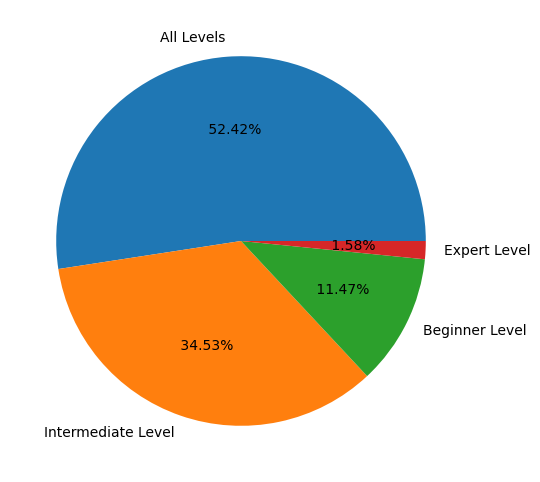

In [19]:
plt.figure(figsize=(6,6))
a=df['level'].unique()
b=df['level'].value_counts()
plt.pie(b,labels=a,autopct='% 1.2f%%')
plt.show()

# 8) Does Number of lectures affect the number of reviews?

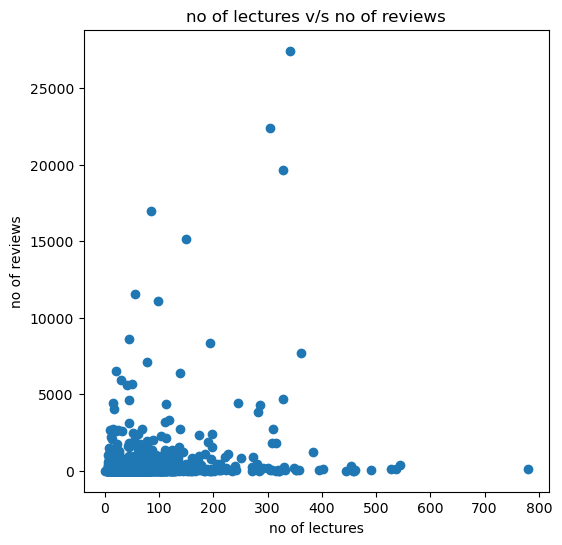

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(x=df['num_lectures'],y=df['num_reviews'])
plt.title('no of lectures v/s no of reviews')
plt.xlabel('no of lectures')
plt.ylabel('no of reviews')
plt.show()

* Scatterplot-It is a visual representation that shows how two variables are realted to each other.It is used to find relationship
between two variables.
* It is bivariate in natures.
* From the above graph we can conclude that as the number of lectures increase the number of reviews decreases.
* It mean number of lectures and number od reviews has negative correaltion
* People prefer courses which has less number of lectures as compared to that which has high number of lectures.

# 9)Plot values of content duration and show it's counts

In [21]:
x=list(df['content_duration'].unique())
x

[1.5,
 39.0,
 2.5,
 3.0,
 2.0,
 1.0,
 5.0,
 7.0,
 4.0,
 0.5833333333333334,
 4.5,
 6.5,
 10.0,
 5.5,
 7.5,
 11.5,
 16.0,
 3.5,
 9.0,
 8.5,
 11.0,
 0.7,
 9.5,
 0.55,
 62.0,
 0.1333333333333333,
 0.6833333333333333,
 31.5,
 20.0,
 6.0,
 46.5,
 0.7166666666666667,
 17.5,
 12.0,
 0.5333333333333333,
 24.0,
 19.5,
 20.5,
 0.5,
 10.5,
 0.5166666666666666,
 0.6,
 8.0,
 29.0,
 26.0,
 24.5,
 13.0,
 0.7333333333333333,
 0.5666666666666667,
 12.5,
 0.3166666666666666,
 0.6166666666666667,
 0.6666666666666666,
 18.0,
 33.0,
 71.5,
 47.0,
 14.5,
 0.65,
 18.5,
 43.5,
 0.6333333333333333,
 14.0,
 0.4666666666666667,
 45.0,
 70.0,
 0.0,
 29.5,
 13.5,
 0.45,
 21.0,
 68.5,
 30.0,
 17.0,
 16.5,
 15.0,
 78.5,
 0.4833333333333333,
 34.0,
 31.0,
 15.5,
 28.5,
 23.0,
 38.0,
 32.5,
 19.0,
 37.5,
 25.0,
 25.5,
 60.0,
 22.5,
 21.5,
 27.5,
 44.5,
 51.0,
 57.0,
 76.5,
 22.0,
 30.5,
 43.0,
 42.0,
 26.5,
 48.5,
 23.5,
 66.5]

In [22]:
y=list(df['content_duration'].value_counts())
y

[606,
 506,
 419,
 269,
 248,
 182,
 144,
 113,
 108,
 93,
 69,
 61,
 53,
 48,
 41,
 35,
 29,
 29,
 29,
 28,
 27,
 24,
 23,
 21,
 21,
 21,
 20,
 20,
 18,
 18,
 18,
 18,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 14,
 12,
 11,
 9,
 9,
 9,
 9,
 8,
 7,
 7,
 7,
 6,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

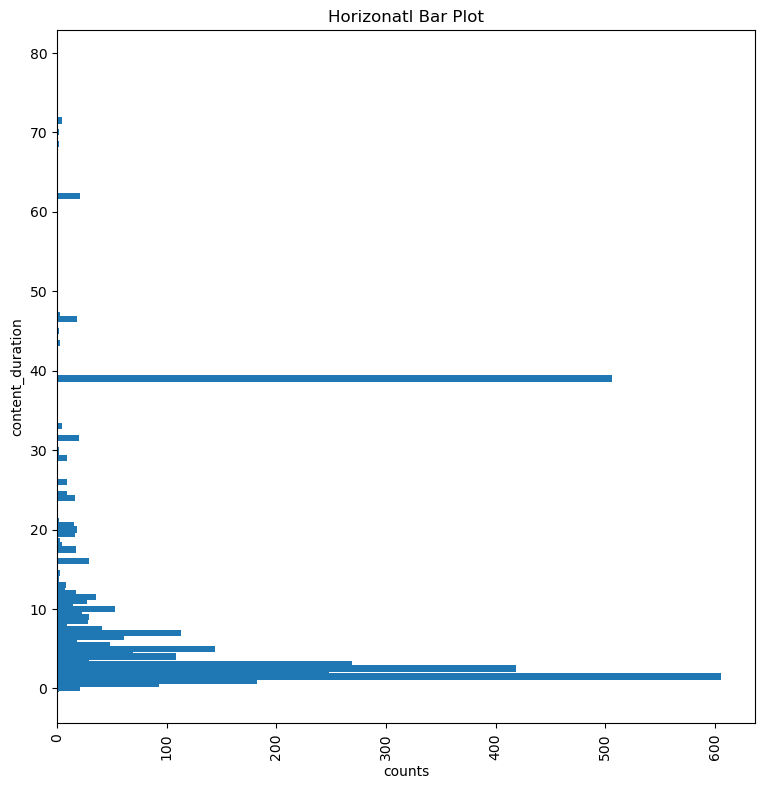

In [23]:
#to plot a graph of content_duration and its value counts
plt.figure(figsize=(9,9))
plt.barh(x,y)
plt.xlabel('counts')
plt.ylabel('content_duration')
plt.title('Horizonatl Bar Plot')
plt.xticks(rotation=90)
plt.show()

* Braplot-It is univariate.
* It shows categorical data as rectangular bars with the heught of bars proportinal to the value they represents.
*It compare unique value of a column with their counts.
* From above graph we can say that as the duration period increase it counts decreses.
* The maximum counts lies between 0 to 10 hours.
* Where as the points can be seen to be high between 35 to 40 hrs.
* Minimum counts lies oabove 50 hrs.

# 10)Which courses has higher number of subscribers Free or Paid.

<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

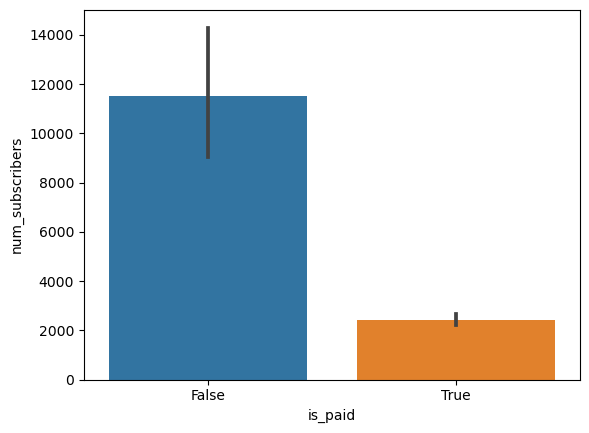

In [24]:
sns.barplot(data=df,x='is_paid',y='num_subscribers')


Number of subscribers are higher in case of free courses as compared to paid courses.

# 11)Which courses has the highest number of reviews.

In [25]:
df.columns  #Shiws heading of columns from datasets.

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<AxesSubplot:xlabel='subject', ylabel='num_reviews'>

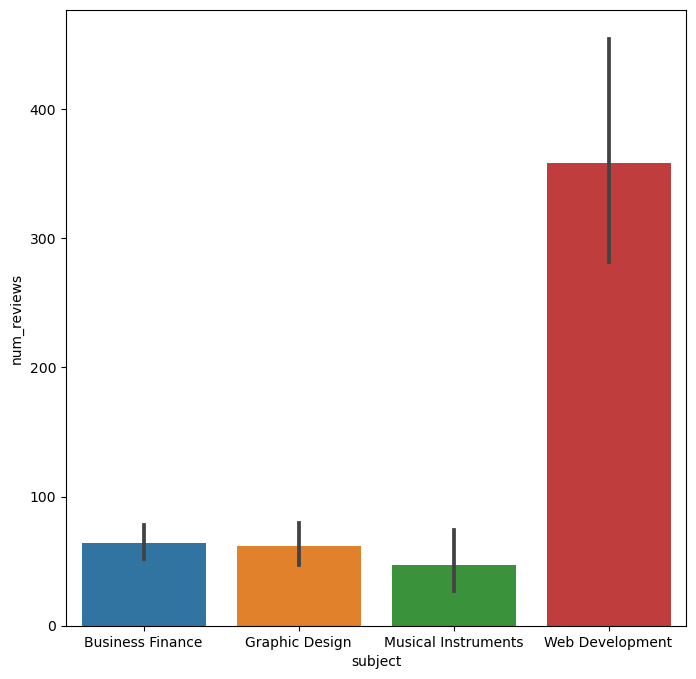

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x='subject',y='num_reviews')

* Braplot compares two variables together.
* Here subject wise reviews has been plotted.
* Number of reviews on each subject has been drwan here.
* Web Development category courses has the highest number of reviews as compared to others musical instument has leats number of reviews.

# 13)Find Most Popular Course Title

In [27]:
# Here we are finding the most popular courses in accordance to the number of subscribers.
df[df['num_subscribers'].max()==df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# 14)Display 10 Most Popular Courses As Per Number of Reviews And Number of Subscribers

# A)

In [28]:
top_reviewed=df.sort_values(by=['num_reviews'],ascending=False).head(10)

In [29]:
top_reviewed

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11 07:29:29+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28 19:20:21+00:00,Web Development
3246,289230,Learn and Understand AngularJS,https://www.udemy.com/learn-angularjs/,True,175,59361,11580,55,All Levels,7.0,2014-09-24 00:57:25+00:00,Web Development
3251,461160,Learn and Understand NodeJS,https://www.udemy.com/understand-nodejs/,True,195,58208,11123,98,All Levels,13.0,2015-08-31 21:07:48+00:00,Web Development
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3228,719002,Angular 2 with TypeScript for Beginners: The P...,https://www.udemy.com/angular-2-tutorial-for-b...,True,150,40070,8341,194,All Levels,9.5,2016-03-03 20:17:59+00:00,Web Development
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments


<AxesSubplot:xlabel='num_reviews', ylabel='course_title'>

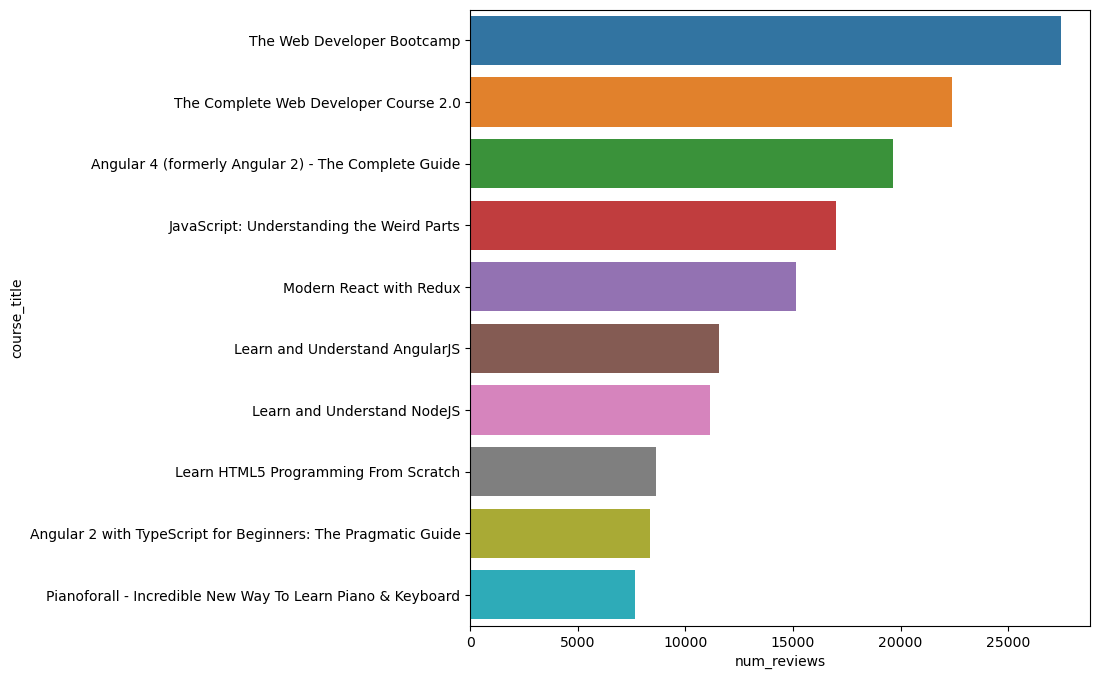

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(data=top_reviewed,x='num_reviews',y='course_title')

* Here most popular courses videos has been shown in accordance to the number of reviews they have.
* Barplot is used to show the graphical represnetation of top most popular courses with the course title.
* Here the maximum review is of around 25000 and the minimum has reviews below 1000.

# B)

In [31]:
top_subscribed=df.sort_values(by=['num_subscribers'],ascending=False).head(10)

In [32]:
top_subscribed

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development


<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

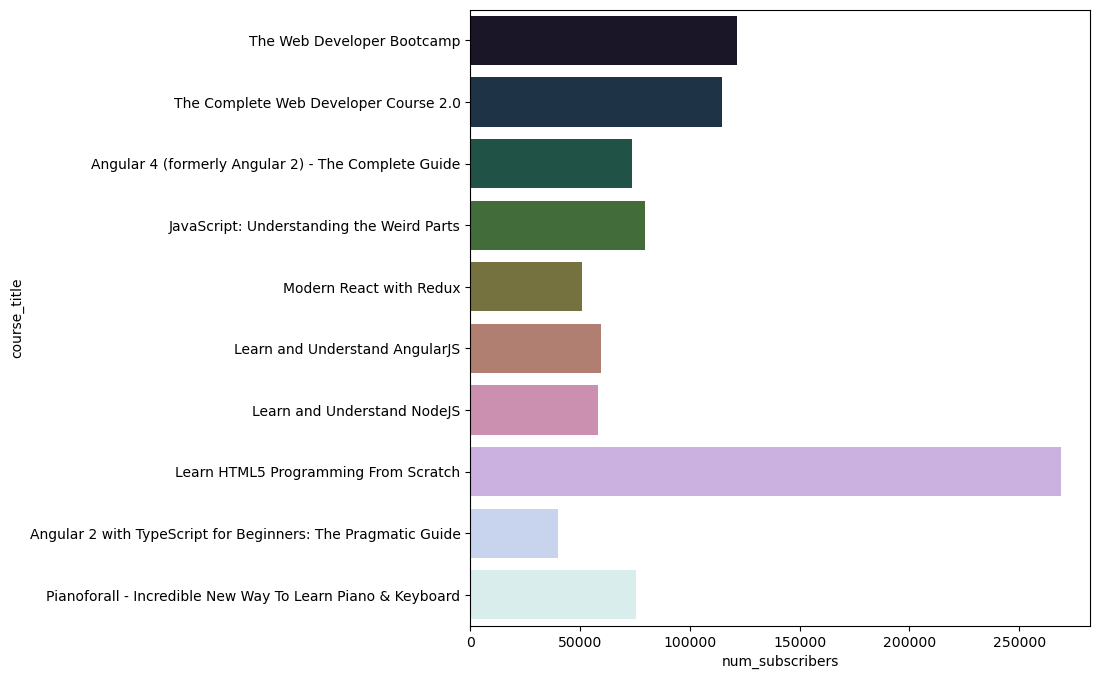

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(data=top_reviewed,x='num_subscribers',y='course_title',palette='cubehelix')

# 15)Find Courses Related to Python.

In [34]:
(df[df['course_title'].str.contains('python',case=False)])

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance
536,529828,Python for Trading & Investing,https://www.udemy.com/python-for-trading-inves...,True,95,638,25,36,All Levels,5.0,2015-06-17 22:23:31+00:00,Business Finance
762,1088656,Quantitative Trading Analysis with Python,https://www.udemy.com/quantitative-trading-ana...,True,50,256,17,49,All Levels,5.5,2017-01-27 17:11:28+00:00,Business Finance
863,902888,Investment Portfolio Analysis with Python,https://www.udemy.com/investment-portfolio-ana...,True,50,209,13,37,All Levels,7.0,2016-07-13 21:40:32+00:00,Business Finance
1682,546848,Learn to code in Python and learn Adobe Photos...,https://www.udemy.com/learn-to-code-in-python-...,True,50,1132,1,29,All Levels,2.0,2015-07-08 00:15:12+00:00,Graphic Design
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development


* Courses realted to python has been displayed here.
* As the course_title is of string datatype here python keyword is specified and by default python is case sensitive
so we made if false so that every title which has python word in it will be displayed.
* There are thirty courses in the dataset which is realetd to python.

# 16)In which Year the highest number of courses was pulished.

In [35]:
# As we only want to see the year and not the date or timing we using dt.year method.
# we have created a new column in our data frame that is hwoing only year of publish
df['Year']=df['published_timestamp'].dt.year

In [36]:
df.head()  #we can see new column as year has been created

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016


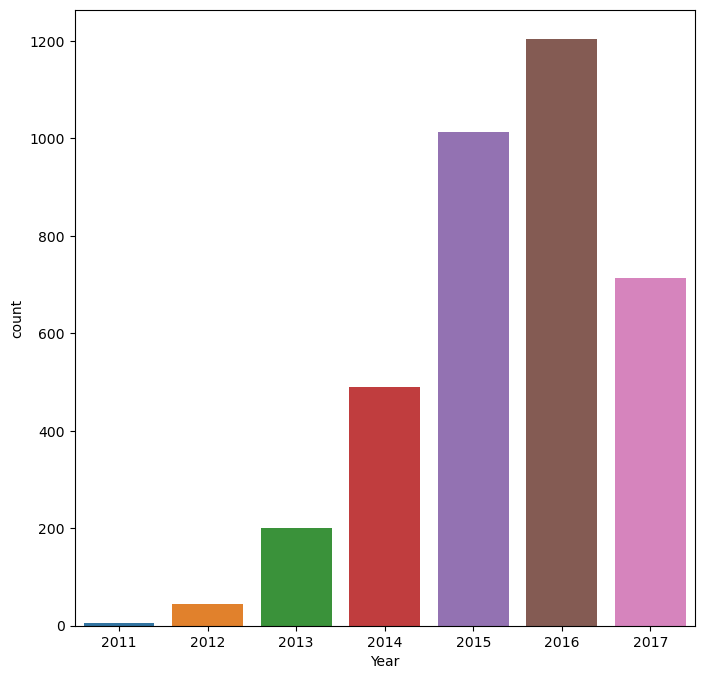

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='Year')
plt.show()

* Here we can see our dataset has records from year 2011 to year 2017.
* Year 2017 has shown the highest number of courses published.
* Year 2011 has least number of courses published.

# 17)Display Category Wise Count of Posted Subjects [Year Wise].

In [38]:
course=df.groupby('Year')['subject'].value_counts()
course

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64

* Group of every subject is made based on years of publish.
* From year 2011 to 2017 group is made and based on year every subjects counts has been displayed.

# Show the Distribution of number of subscribers in database.

In [39]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration,Year
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603,2015.431100
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830,1.184731
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000,2015.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000,2016.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000,2016.000000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


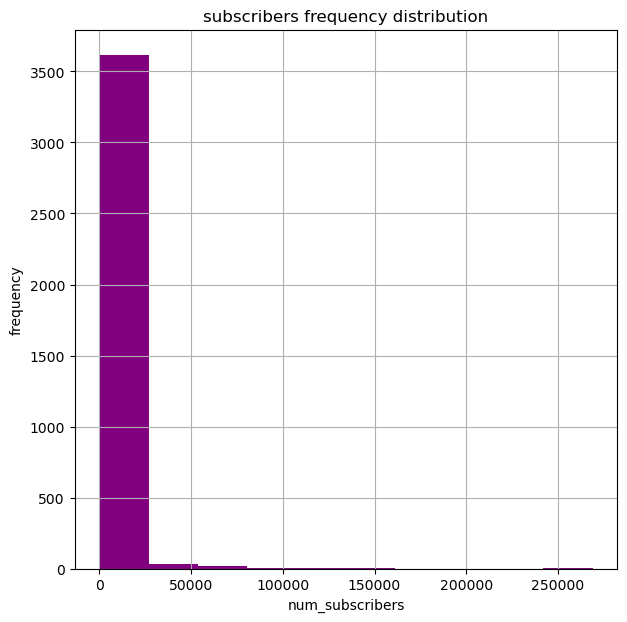

In [40]:
plt.figure(figsize=(7,7))
plt.hist(df['num_subscribers'],bins=10,color='purple')
plt.title('subscribers frequency distribution')
plt.xlabel('num_subscribers')
plt.ylabel('frequency')
plt.grid()
plt.show()